# Data Wrangling with Penguins

# Ideas for next steps: 
- Do the exercise in [1.9](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_gapminder/data_wrangling.html)
- Some Recap exercises:
    - https://www.academis.eu/posts/data_analysis_EN/seven_lines/select_df.md
    - https://www.academis.eu/posts/data_analysis_EN/seven_lines/filter_df.md
    - https://www.academis.eu/posts/data_analysis_EN/seven_lines/plot.md
- Open gapminder life expectancy data in pandas, and:
    - find an interesting statistic to share on Slack
    - plot an interesting finding and share the plot on Slack
- Read chapter 8 from [Storytelling with Data by Cole Nussbaumer Knaflic](https://github.com/AmandaZou/Data-Science-books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.pdf) for a nice primer on how to create beautiful and effective data visualizations
- Get started on the first steps (1-5) of the [Animated Scatterplot Exercise 1.8.2](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_gapminder/long_vs_wide.html)

In [52]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [53]:
df1 = pd.read_excel('gapminder_lifeexpectancy.xlsx')

In [54]:
df1.head()

,Life expectancy,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [55]:
df1_1 = df1[['Life expectancy', 2000]]
df1_1


,Life expectancy,2000.0
0,Abkhazia,NaN
1,Afghanistan,50.1
2,Akrotiri and Dhekelia,NaN
3,Albania,74.7
4,Algeria,73.3
...,...,...
255,Yugoslavia,NaN
256,Zambia,44.8
257,Zimbabwe,47.9
258,Åland,80.0


In [56]:
df2 = pd.read_csv('continents.csv', sep=';')

In [57]:
df2.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [58]:
df_m = pd.merge(df2, df1_1, how = 'left', left_on = 'country', right_on  = 'Life expectancy' )
df_m

,continent,country,Life expectancy,2000.0
0,Africa,Algeria,Algeria,73.3
1,Africa,Angola,Angola,52.3
2,Africa,Benin,Benin,57.2
3,Africa,Botswana,Botswana,47.6
4,Africa,Burkina,NaN,NaN
...,...,...,...,...
189,South America,Paraguay,Paraguay,74.2
190,South America,Peru,Peru,74.6
191,South America,Suriname,Suriname,69.7
192,South America,Uruguay,Uruguay,74.6


In [59]:
df_c = df_m.dropna()
df_c

,continent,country,Life expectancy,2000.0
0,Africa,Algeria,Algeria,73.3
1,Africa,Angola,Angola,52.3
2,Africa,Benin,Benin,57.2
3,Africa,Botswana,Botswana,47.6
5,Africa,Burundi,Burundi,46.7
...,...,...,...,...
189,South America,Paraguay,Paraguay,74.2
190,South America,Peru,Peru,74.6
191,South America,Suriname,Suriname,69.7
192,South America,Uruguay,Uruguay,74.6


In [72]:
df_completed = df_c.drop('Life expectancy', axis=1)
df_completed

,continent,country,2000.0
0,Africa,Algeria,73.3
1,Africa,Angola,52.3
2,Africa,Benin,57.2
3,Africa,Botswana,47.6
5,Africa,Burundi,46.7
...,...,...,...
189,South America,Paraguay,74.2
190,South America,Peru,74.6
191,South America,Suriname,69.7
192,South America,Uruguay,74.6


In [67]:
#df_completed_2 = df_completed.rename(columns={2000 : 'life expectancy of 2000'}, inplace=True)



In [82]:
df_f = df_completed.groupby(df_completed['continent']).max()
df_f

,country,2000.0
continent,,
Africa,Zimbabwe,75.0
Asia,Yemen,81.0
Australia and Oceania,Vanuatu,79.8
Europe,United Kingdom,83.7
North America,United States,79.2
South America,Venezuela,77.3


<AxesSubplot:xlabel='continent', ylabel='2000.0'>

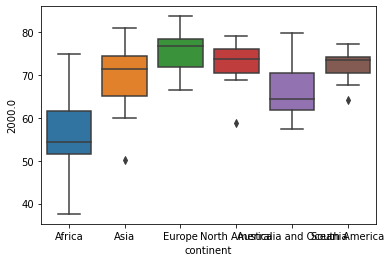

In [88]:
sns.boxplot(x=df_completed['continent'], y=df_completed[2000])